In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from mpl_toolkits.basemap import Basemap

#file to load
infections_ts = "assets/data/infections_timeseries.csv"

#read infections timeseries data
infections = pd.read_csv(infections_ts)

#Split Combined_Key column into county and state columns
infections.dropna(inplace = True)
new = infections["Combined_Key"].str.split(" ", n = 1, expand = True) 
  
# making separate County column from new data frame 
infections["County"]= new[0] 
  
# making separate last name column from new data frame 
infections["State"]= new[1] 
  
# Dropping old Name columns 
#infections.drop(columns =["Combined_Key"], inplace = True)

#infections = pd.merge(new, infections, on="Combined_Key")
#new.head()
#display preview
infections.head()

,FIPS,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,County,State
0,1001,Autauga - Alabama - US,0,0,0,0,0,0,0,0,...,0,0,1,4,6,6,6,6,Autauga,- Alabama - US
1,1003,Baldwin - Alabama - US,0,0,0,0,0,0,0,0,...,2,3,4,4,5,5,10,15,Baldwin,- Alabama - US
2,1005,Barbour - Alabama - US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Barbour,- Alabama - US
3,1007,Bibb - Alabama - US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Bibb,- Alabama - US
4,1009,Blount - Alabama - US,0,0,0,0,0,0,0,0,...,0,0,0,1,2,4,5,5,Blount,- Alabama - US


In [2]:
cols_to_move = ['FIPS', 'State', 'County']
infections = infections[ cols_to_move + [ col for col in infections.columns if col not in cols_to_move ] ]

In [3]:
infections['State'] = infections['State'].str.strip('- ')
infections.head()

,FIPS,State,County,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,1001,Alabama - US,Autauga,Autauga - Alabama - US,0,0,0,0,0,0,...,0,0,0,0,1,4,6,6,6,6
1,1003,Alabama - US,Baldwin,Baldwin - Alabama - US,0,0,0,0,0,0,...,1,2,2,3,4,4,5,5,10,15
2,1005,Alabama - US,Barbour,Barbour - Alabama - US,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1007,Alabama - US,Bibb,Bibb - Alabama - US,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1009,Alabama - US,Blount,Blount - Alabama - US,0,0,0,0,0,0,...,0,0,0,0,0,1,2,4,5,5


In [4]:
infections.drop('Combined_Key', axis=1, inplace=True)
infections.head()

,FIPS,State,County,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/19/20,3/20/20,3/21/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,1001,Alabama - US,Autauga,0,0,0,0,0,0,0,...,0,0,0,0,1,4,6,6,6,6
1,1003,Alabama - US,Baldwin,0,0,0,0,0,0,0,...,1,2,2,3,4,4,5,5,10,15
2,1005,Alabama - US,Barbour,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1007,Alabama - US,Bibb,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1009,Alabama - US,Blount,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,4,5,5


In [5]:
#export to CSV file
infections.to_csv('infections.csv')

In [6]:
#Selecting data for the ten counties in Texas with the most cases
Texas = infections.loc[(infections['State'] == 'Texas - US') & (infections['3/29/20'] != 0)] 
tx_topten = Texas.sort_values(by='3/29/20', ascending=False).head(10)

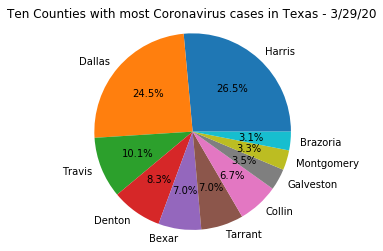

In [7]:
tx_labels = tx_topten['County']
tx_sizes = tx_topten['3/29/20']
fig1, ax1 = plt.subplots()
ax1.pie(tx_sizes, labels=tx_labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Ten Counties with most Coronavirus cases in Texas - 3/29/20')
plt.show()

In [8]:
#Attempting to add multi line chart showing number of cases over time, dropping unesscessary columns, & switching x and y axes
ttt=tx_topten.drop(columns=['FIPS', 'State'], axis=1).set_index('County').transpose()
ttt.head()

County,Harris,Dallas,Travis,Denton,Bexar,Tarrant,Collin,Galveston,Montgomery,Brazoria
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0


In [9]:
# Looking at only March 2020
tx = ttt[-28:]

Text(0, 0.5, 'Number of Positive Cases')

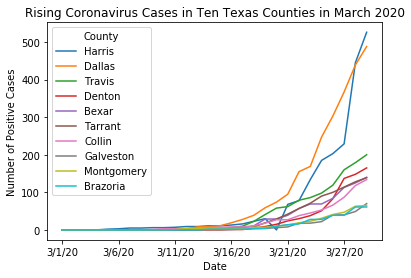

In [10]:
#Line graph
tx.plot()
plt.title("Rising Coronavirus Cases in Ten Texas Counties in March 2020")
plt.xlabel("Date")
plt.ylabel("Number of Positive Cases")